In [52]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [69]:
df = pd.read_csv('../temp_data/histData.csv', parse_dates=True)

In [70]:
len(df)

522

In [58]:
n_samples = 360
test_percentage = 10
anchored = False

In [71]:
hour = pd.to_datetime(df.date).dt.hour
dfa = df.assign(hour = hour)
dfa.tail()

,date,open,high,low,close,volume,hour
517,2019-11-22,1.62195,1.632400,1.620950,1.623975,-1,0
518,2019-11-29,1.62295,1.631500,1.621225,1.629475,-1,0
519,2019-12-06,1.62920,1.629425,1.614825,1.616850,-1,0
520,2019-12-13,1.61805,1.629925,1.609525,1.617200,-1,0
521,2019-12-19,1.61675,1.631475,1.614900,1.619275,-1,0


In [72]:
df1 = dfa[:round(len(dfa)/2)]

In [73]:
len(df1)

261

#### Walk Forward

In [7]:
XY = df1[['close','high','label']].values
X = df1[['close','high']].values
Y = df1['label'].values
n_train = 350
n_records = len(X)

for i in range(n_train, n_records):
    
    X_train, Y_train = X[0:i], Y[0:i]
    X_test, Y_test = X[i:i+1], Y[i:i+1]
    
    print('X_train=%d, X_test=%d' % (len(X_train), len(X_test)))
    
    

X_train=350, X_test=1
X_train=351, X_test=1
X_train=352, X_test=1
X_train=353, X_test=1
X_train=354, X_test=1
X_train=355, X_test=1
X_train=356, X_test=1
X_train=357, X_test=1
X_train=358, X_test=1
X_train=359, X_test=1
X_train=360, X_test=1
X_train=361, X_test=1
X_train=362, X_test=1
X_train=363, X_test=1
X_train=364, X_test=1
X_train=365, X_test=1
X_train=366, X_test=1
X_train=367, X_test=1
X_train=368, X_test=1
X_train=369, X_test=1
X_train=370, X_test=1
X_train=371, X_test=1
X_train=372, X_test=1
X_train=373, X_test=1
X_train=374, X_test=1
X_train=375, X_test=1
X_train=376, X_test=1
X_train=377, X_test=1
X_train=378, X_test=1
X_train=379, X_test=1
X_train=380, X_test=1
X_train=381, X_test=1
X_train=382, X_test=1
X_train=383, X_test=1
X_train=384, X_test=1
X_train=385, X_test=1
X_train=386, X_test=1
X_train=387, X_test=1
X_train=388, X_test=1
X_train=389, X_test=1
X_train=390, X_test=1
X_train=391, X_test=1
X_train=392, X_test=1
X_train=393, X_test=1
X_train=394, X_test=1
X_train=39

In [74]:

yhatList = []
predictDateList = []

X = df1[['close','high', 'low', 'open']].values
Y = df1['close'].values
date = df1['date'].values

n_attributes = X.shape[1]
n_train = 75
n_records = len(Y)
for i in range(n_train, n_records-1):
    
    train, test = X[0:i], Y[i:i+1]
    #print('train=%d, test=%d' % (len(train), len(test)))
    print('Training feature date: %s ' %date[i-1:i])
    print('Training target date: %s ' %date[i:i+1])
    
    # reshape the data
    train = train.reshape(1,n_attributes,-1) ###################### set number of features
    #print(train.shape)
    #print(test.shape)
    
    # determine the number of input features
    n_features = train.shape[1]
    #print(n_features)
    n_steps = train.shape[2]
    #print(n_steps)
    
    # define model
    model = Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(n_features,n_steps)))
    model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    model.add(Flatten())
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer='adam', loss='mse')
    
    # fit the model
    model.fit(train, test, epochs=10, batch_size=1, verbose=0)
    
    
    # predict it on the next data
    j = 1
    train, test = X[0+j:i+j], Y[i+j:i+1+j]
    #print('train=%d, test=%d' % (len(train), len(test)))
    print('Predicting feature date: %s ' %date[i+j-1:i+j])
    print('Predicting target date: %s ' %date[i+j:i+1+j])
    predictDateList.append(date[i+j-1:i+j][0])   ####### predicting feautre date would be stored on predicting date list
    
    # reshape the data
    train = train.reshape(1,n_attributes,-1) ###################### set number of features
    #print(train.shape)
    #print(test.shape)
    
    # predict through the model
    predict = model.predict(train)
    yhatList.append(predict[0][0])
    
    # evaluate the model
    error = model.evaluate(train, test, verbose=0)
    print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
    


Training feature date: ['2011-05-27'] 
Training target date: ['2011-06-03'] 
Predicting feature date: ['2011-06-03'] 
Predicting target date: ['2011-06-10'] 
MSE: 0.003, RMSE: 0.050
Training feature date: ['2011-06-03'] 
Training target date: ['2011-06-10'] 
Predicting feature date: ['2011-06-10'] 
Predicting target date: ['2011-06-17'] 
MSE: 2.061, RMSE: 1.436
Training feature date: ['2011-06-10'] 
Training target date: ['2011-06-17'] 
Predicting feature date: ['2011-06-17'] 
Predicting target date: ['2011-06-24'] 
MSE: 0.046, RMSE: 0.214
Training feature date: ['2011-06-17'] 
Training target date: ['2011-06-24'] 
Predicting feature date: ['2011-06-24'] 
Predicting target date: ['2011-07-01'] 
MSE: 0.006, RMSE: 0.080
Training feature date: ['2011-06-24'] 
Training target date: ['2011-07-01'] 
Predicting feature date: ['2011-07-01'] 
Predicting target date: ['2011-07-08'] 
MSE: 0.005, RMSE: 0.070
Training feature date: ['2011-07-01'] 
Training target date: ['2011-07-08'] 
Predicting fe

In [126]:
predictDateList

['2018-10-05',
 '2018-10-08',
 '2018-10-09',
 '2018-10-10',
 '2018-10-11',
 '2018-10-12',
 '2018-10-15',
 '2018-10-16',
 '2018-10-17',
 '2018-10-18',
 '2018-10-19',
 '2018-10-22',
 '2018-10-23',
 '2018-10-24',
 '2018-10-25',
 '2018-10-26',
 '2018-10-29',
 '2018-10-30',
 '2018-10-31',
 '2018-11-01',
 '2018-11-02',
 '2018-11-05',
 '2018-11-06',
 '2018-11-07',
 '2018-11-08',
 '2018-11-09',
 '2018-11-12',
 '2018-11-13',
 '2018-11-14',
 '2018-11-15',
 '2018-11-16',
 '2018-11-19',
 '2018-11-20',
 '2018-11-21',
 '2018-11-22',
 '2018-11-23',
 '2018-11-26',
 '2018-11-27',
 '2018-11-28',
 '2018-11-29',
 '2018-11-30',
 '2018-12-03',
 '2018-12-04',
 '2018-12-05',
 '2018-12-06',
 '2018-12-07',
 '2018-12-10',
 '2018-12-11',
 '2018-12-12',
 '2018-12-13',
 '2018-12-14',
 '2018-12-17',
 '2018-12-18',
 '2018-12-19',
 '2018-12-20',
 '2018-12-21',
 '2018-12-24',
 '2018-12-26',
 '2018-12-27',
 '2018-12-28',
 '2018-12-31',
 '2019-01-02',
 '2019-01-03',
 '2019-01-04',
 '2019-01-07',
 '2019-01-08',
 '2019-01-

In [75]:
result = pd.DataFrame({'date': predictDateList, 'predict':yhatList})

In [76]:
result

,date,predict
0,2011-06-03,1.411909
1,2011-06-10,-0.088139
2,2011-06-17,1.566701
3,2011-06-24,1.268144
4,2011-07-01,1.256647
...,...,...
180,2014-11-14,1.039055
181,2014-11-21,1.498423
182,2014-11-28,1.284619
183,2014-12-05,1.895554


In [77]:
df_x = df.merge(result, how='inner', on='date')

In [78]:
df_x

,date,open,high,low,close,volume,predict
0,2011-06-03,1.334600,1.367500,1.333775,1.365600,-1,1.411909
1,2011-06-10,1.364800,1.383925,1.357600,1.361625,-1,-0.088139
2,2011-06-17,1.360950,1.362600,1.337525,1.347450,-1,1.566701
3,2011-06-24,1.346875,1.361150,1.343975,1.352450,-1,1.268144
4,2011-07-01,1.353050,1.368875,1.344875,1.348575,-1,1.256647
...,...,...,...,...,...,...,...
180,2014-11-14,1.441700,1.444075,1.422650,1.431425,-1,1.039055
181,2014-11-21,1.428575,1.463325,1.424650,1.429450,-1,1.498423
182,2014-11-28,1.426225,1.470275,1.423700,1.463700,-1,1.284619
183,2014-12-05,1.468425,1.483225,1.459175,1.476425,-1,1.895554


In [131]:
df_x.to_csv('predict_data.csv')

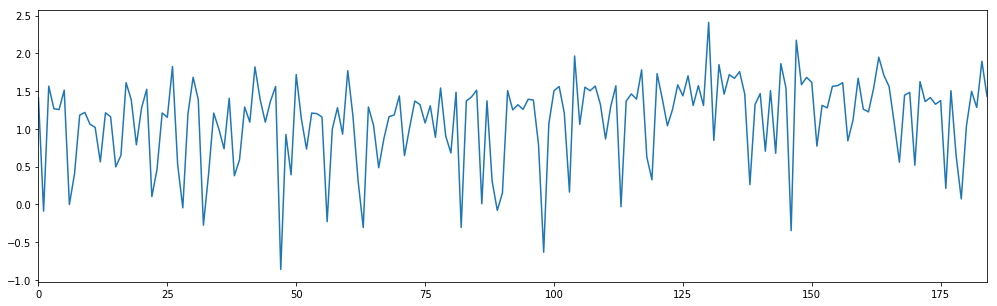

In [79]:
df_x.predict.plot(figsize=(17,5))

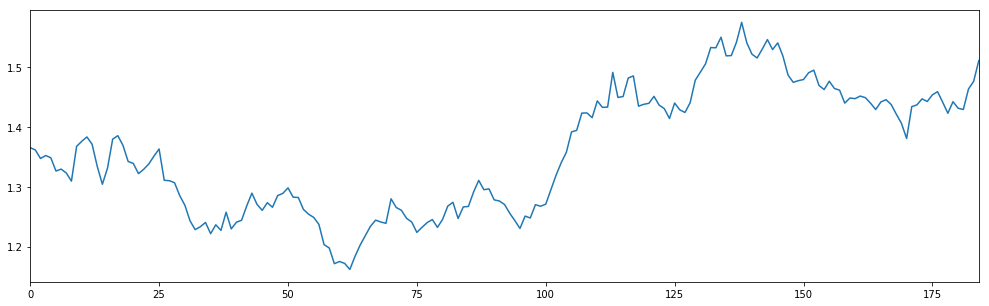

In [80]:
df_x.close.plot(figsize=(17,5))

### Plain MLP Regression

In [81]:
df.tail()

,date,open,high,low,close,volume
517,2019-11-22,1.62195,1.632400,1.620950,1.623975,-1
518,2019-11-29,1.62295,1.631500,1.621225,1.629475,-1
519,2019-12-06,1.62920,1.629425,1.614825,1.616850,-1
520,2019-12-13,1.61805,1.629925,1.609525,1.617200,-1
521,2019-12-19,1.61675,1.631475,1.614900,1.619275,-1


In [82]:
target = df.close.shift(-1)
dfn = df.assign(target= target)
dfn.tail()

,date,open,high,low,close,volume,target
517,2019-11-22,1.62195,1.632400,1.620950,1.623975,-1,1.629475
518,2019-11-29,1.62295,1.631500,1.621225,1.629475,-1,1.616850
519,2019-12-06,1.62920,1.629425,1.614825,1.616850,-1,1.617200
520,2019-12-13,1.61805,1.629925,1.609525,1.617200,-1,1.619275
521,2019-12-19,1.61675,1.631475,1.614900,1.619275,-1,NaN


In [83]:
dfn1 = dfn.dropna()

In [86]:
dfn2 = dfn1[:round(len(dfn1)/2)]

In [87]:
# split into input and output columns
X, y = dfn2[['open', 'high', 'low', 'close']].values, dfn2['target'].values

In [88]:
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(174, 4) (86, 4) (174,) (86,)


In [103]:
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mse')
# fit the model
model.fit(X_train, y_train, epochs=30, batch_size=4, verbose=0)
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 0.006, RMSE: 0.075


In [104]:
dfn3 = dfn1[round(len(dfn1)/2):]

In [105]:
# get input features
X_val = dfn3[['open', 'high', 'low', 'close']].values

In [106]:
X_val.shape

(261, 4)

In [107]:
# make a prediction
yhat = model.predict(X_val)
#print('Predicted: %.3f' % yhat)

In [108]:
yhat

array([[1.4117573],
       [1.4089701],
       [1.4054372],
       [1.397147 ],
       [1.3874028],
       [1.3840415],
       [1.3910762],
       [1.3974615],
       [1.3975502],
       [1.3960038],
       [1.3922236],
       [1.3849208],
       [1.3765297],
       [1.3758923],
       [1.3787004],
       [1.3864405],
       [1.3820318],
       [1.3752358],
       [1.3756343],
       [1.3817531],
       [1.3850542],
       [1.3837695],
       [1.3834951],
       [1.3856236],
       [1.3936636],
       [1.3969324],
       [1.3960606],
       [1.3966919],
       [1.3973627],
       [1.4050558],
       [1.4032588],
       [1.4058117],
       [1.4109954],
       [1.4054338],
       [1.4085621],
       [1.4179173],
       [1.4321399],
       [1.4336498],
       [1.4363282],
       [1.4318815],
       [1.4328285],
       [1.4350206],
       [1.4272969],
       [1.4251378],
       [1.4212862],
       [1.418643 ],
       [1.4175761],
       [1.4127835],
       [1.4053372],
       [1.4002659],


In [109]:
dfn4 = dfn3.assign(predict = yhat[:,0])

In [110]:
dfn4.tail()

,date,open,high,low,close,volume,target,predict
516,2019-11-15,1.60695,1.626475,1.605650,1.620925,-1,1.623975,1.440008
517,2019-11-22,1.62195,1.632400,1.620950,1.623975,-1,1.629475,1.442343
518,2019-11-29,1.62295,1.631500,1.621225,1.629475,-1,1.616850,1.442780
519,2019-12-06,1.62920,1.629425,1.614825,1.616850,-1,1.617200,1.441607
520,2019-12-13,1.61805,1.629925,1.609525,1.617200,-1,1.619275,1.440787


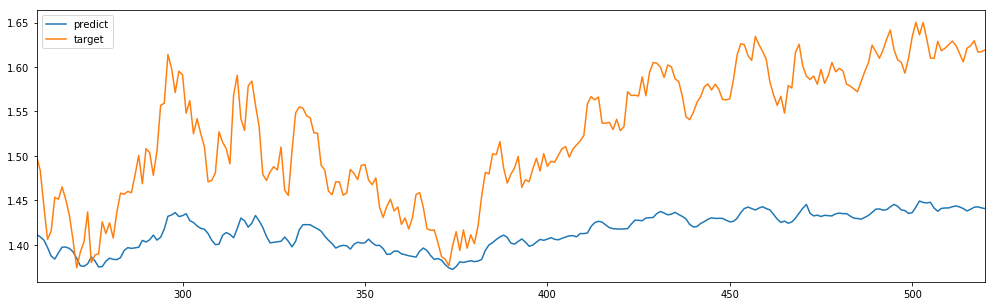

In [111]:
dfn4[['predict', 'target']].plot(figsize=(17,5));